<a href="https://colab.research.google.com/github/MDfarazuddin99/BigQuery_Dash_Project/blob/main/CMPE_255_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authentication

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

%reload_ext google.colab.data_table

Authenticated


In [ ]:
project_id = 'emerald-cacao-363700'

In [ ]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = farazuddin.mohammad@sjsu.edu

Your active configuration is: [default]


In [ ]:
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'emerald-cacao-363700'
client = bigquery.Client(project=project_id)

#Print your current data
if(len(list(client.list_datasets())) > 0):
  for dataset in client.list_datasets():
    print(dataset.dataset_id)
else:
  print("No Tables added to Project")

Iowa_Liquor_Data


In [ ]:
from google.colab import files

In [ ]:
query_raw = """
SELECT
    *
FROM
    `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 10000
"""

dfquery = client.query(query_raw)
df = dfquery.to_dataframe()
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-45585700044,2022-03-15,2544,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.91273 42.038963),64,MARSHALL,...,33717,Paramount Sloe Gin,12,1000,5.42,8.13,6,48.78,6.0,1.58
1,INV-34780200039,2021-03-05,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003.0,POINT (-94.01679600000001 41.61025),25,DALLAS,...,101217,Captain Morgan OSR PET 6/1.75l w/ 50ml CM Sli...,6,1750,18.00,27.00,270,7290.00,472.5,124.82
2,INV-27126500108,2020-05-08,2613,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501.0,POINT (-95.879662 41.261925),78,POTTAWATTA,...,33717,Paramount Sloe Gin,12,1000,5.42,8.13,6,48.78,6.0,1.58
3,S08433500070,2012-10-18,2529,Hy-Vee Drugstore #4 / Cedar Rapids,4825 JOHNSON AVE NW,CEDAR RAPIDS,52405,POINT (-91.73337 41.968343),57,Linn,...,82187,Arrow Spearmint Schnapps,12,1000,4.75,7.13,4,28.52,4.0,1.06
4,S18024500017,2014-03-24,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,POINT (-91.373211 40.62422600000001),56,Lee,...,26906,Jack Daniels Single Barrel Why.,6,750,26.59,39.89,18,718.02,13.5,3.57


In [ ]:
df_datatypes = pd.DataFrame(df.dtypes)
df_datatypes.to_csv('/content/drive/MyDrive/CMPE 255/data_types.csv')

In [ ]:
print("Total Number of Unique Cities is : {0}".format(df['city'].nunique()))
for i in range(len(list(df['city'].unique()))):
  print("City#{0} {1}".format(i,df['city'][i]))

Total Number of Unique Cities is : 507
City#0 Marshalltown
City#1 Adel
City#2 Council Bluffs
City#3 CEDAR RAPIDS
City#4 FORT MADISON
City#5 BURLINGTON
City#6 WILLIAMSBURG
City#7 ROCK RAPIDS
City#8 Mason City
City#9 Des Moines
City#10 BURLINGTON
City#11 Waukee
City#12 Marion
City#13 Algona
City#14 Algona
City#15 Des Moines
City#16 Des Moines
City#17 Washington
City#18 Des Moines
City#19 West Des Moines
City#20 Keokuk
City#21 Burlington
City#22 MARSHALLTOWN
City#23 Marion
City#24 NEWTON
City#25 Clear Lake
City#26 SIOUX CITY
City#27 Sigourney
City#28 Council Bluffs
City#29 Davenport
City#30 West Des Moines
City#31 Des Moines
City#32 CEDAR FALLS
City#33 West Des Moines
City#34 Templeton
City#35 WINDSOR HEIGHTS
City#36 Templeton
City#37 DUBUQUE
City#38 West Des Moines
City#39 Denver
City#40 Davenport
City#41 West Des Moines
City#42 Iowa City
City#43 Sioux City
City#44 West Des Moines
City#45 CEDAR RAPIDS
City#46 Mason City
City#47 Cedar Falls
City#48 Des Moines
City#49 IOWA CITY
City#50 DeW

In [ ]:
df['city'].value_counts()

DES MOINES      688
Des Moines      469
CEDAR RAPIDS    384
DAVENPORT       331
Cedar Rapids    273
               ... 
Monroe            1
ALTA VISTA        1
Sioux Rapids      1
GEORGE            1
CONRAD            1
Name: city, Length: 507, dtype: int64

In [ ]:
df.isnull().sum()

invoice_and_item_number      0
date                         0
store_number                 0
store_name                   0
address                     14
city                        14
zip_code                    14
store_location             970
county_number               50
county                      50
category                   255
category_name              308
vendor_number                0
vendor_name                  0
item_number                  0
item_description             0
pack                         0
bottle_volume_ml             0
state_bottle_cost            0
state_bottle_retail          0
bottles_sold                 0
sale_dollars                 0
volume_sold_liters           0
volume_sold_gallons          0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date,Year,Month,Day
0,INV-45585700044,2022-03-15,2544,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.91273 42.038963),64,MARSHALL,...,5.42,8.13,6,48.78,6.0,1.58,2022-03-15,2022,3,15
1,INV-34780200039,2021-03-05,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003.0,POINT (-94.01679600000001 41.61025),25,DALLAS,...,18.00,27.00,270,7290.00,472.5,124.82,2021-03-05,2021,3,5
2,INV-27126500108,2020-05-08,2613,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501.0,POINT (-95.879662 41.261925),78,POTTAWATTA,...,5.42,8.13,6,48.78,6.0,1.58,2020-05-08,2020,5,8
3,S08433500070,2012-10-18,2529,Hy-Vee Drugstore #4 / Cedar Rapids,4825 JOHNSON AVE NW,CEDAR RAPIDS,52405,POINT (-91.73337 41.968343),57,Linn,...,4.75,7.13,4,28.52,4.0,1.06,2012-10-18,2012,10,18
4,S18024500017,2014-03-24,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,POINT (-91.373211 40.62422600000001),56,Lee,...,26.59,39.89,18,718.02,13.5,3.57,2014-03-24,2014,3,24


In [ ]:
print("Start Date: {0}".format(df['Date'].min()))
print("End Date: {0}".format(df['Date'].max()))

Start Date: 2012-01-03 00:00:00
End Date: 2022-06-30 00:00:00


In [ ]:
print("Number of Categories of Liquor: {0}".format(df['category_name'].nunique()))
for i in range(len(list(df['category_name']))):
  df['category_name'].unique()

Number of Categories of Liquor: 75


In [ ]:
df_plot = df.fillna('NA').groupby(['category_name','pack','date'])['sale_dollars'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))

# Bar Plot for Sales of Liquor per Category

In [ ]:
fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

# Bar Plot for Cumulative Sales of liquor per City

In [ ]:
df_plot = df.fillna('NA').groupby(['city','pack','date'])['sale_dollars'].sum().groupby(
            ['city','pack']).max().sort_values().groupby(
            ['city']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(20))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per city",
    xaxis_title=" City Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

# Bar Plot for Cumulative Monthly Liquor Sales

In [ ]:
df_plot = df.fillna('NA').groupby(['Month','pack','Date'])['sale_dollars'].sum().groupby(
            ['Month','pack']).max().sort_values().groupby(
            ['Month']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Month",
    xaxis_title=" Month Number",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [ ]:
daily_sales = df.groupby('Date', as_index=False)['sale_dollars'].sum()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
daily_sales_sc = go.Scatter(x=daily_sales['Date'], y=daily_sales['sale_dollars'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

# Sales Vs Volume Sold in Liters

In [ ]:
df_plot = df.fillna('NA').groupby(['category_name','pack','Date'])['sale_dollars'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)

df_plot = df.fillna('NA').groupby(['category_name','pack','Date'])['volume_sold_liters'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count2 = pd.DataFrame(df_plot)
top_count = pd.concat([top_count1 , top_count2],axis=1)
top_count = top_count.sort_values(['sale_dollars'],ascending=False)[:10]

In [ ]:
top_count

,sale_dollars,volume_sold_liters
category_name,,
DECANTERS & SPECIALTY PACKAGES,68756.37,2784.10
Temporary & Specialty Packages,33195.60,1239.20
Corn Whiskies,32776.80,522.00
Special Order Items,31206.96,2454.30
IRISH WHISKIES,30254.37,1165.50
SINGLE MALT SCOTCH,25683.86,533.50
Straight Rye Whiskies,24302.96,686.60
STRAIGHT RYE WHISKIES,22093.92,636.75
Imported Vodka,19323.28,1529.43


# Bar Liquor Sales In dollars and liters

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='sale in dollars',x=top_count.index, y=top_count['sale_dollars']),
    go.Bar(name='Volume in litres',x=top_count.index, y=top_count['volume_sold_liters'])
])
# Change the bar mode
fig.update_layout(barmode='group',title="Sales of liquors with category and the volume of liquor sold.",
    xaxis_title=" category",
    yaxis_title="Sale and the amount of liquor sold in litre.",)
fig.show()

In [ ]:
df_scatter = df[["item_description","sale_dollars","volume_sold_liters",]].groupby(by="item_description",as_index=False).sum()
df_scatter = df_scatter[df_scatter["sale_dollars"] <= 80000]
df_scatter.head()

,item_description,sale_dollars,volume_sold_liters
0,1800 Silver,1177.68,33.6
1,1800 Silver Tequila 750ml w/ 1800 Coconut 200ml,973.98,31.5
2,1800 Ultimate Skinny Margarita,90.00,9.0
3,2 Gingers,6859.56,297.0
4,2 Gingers Mini,2435.26,158.4


# Correlation Matrix

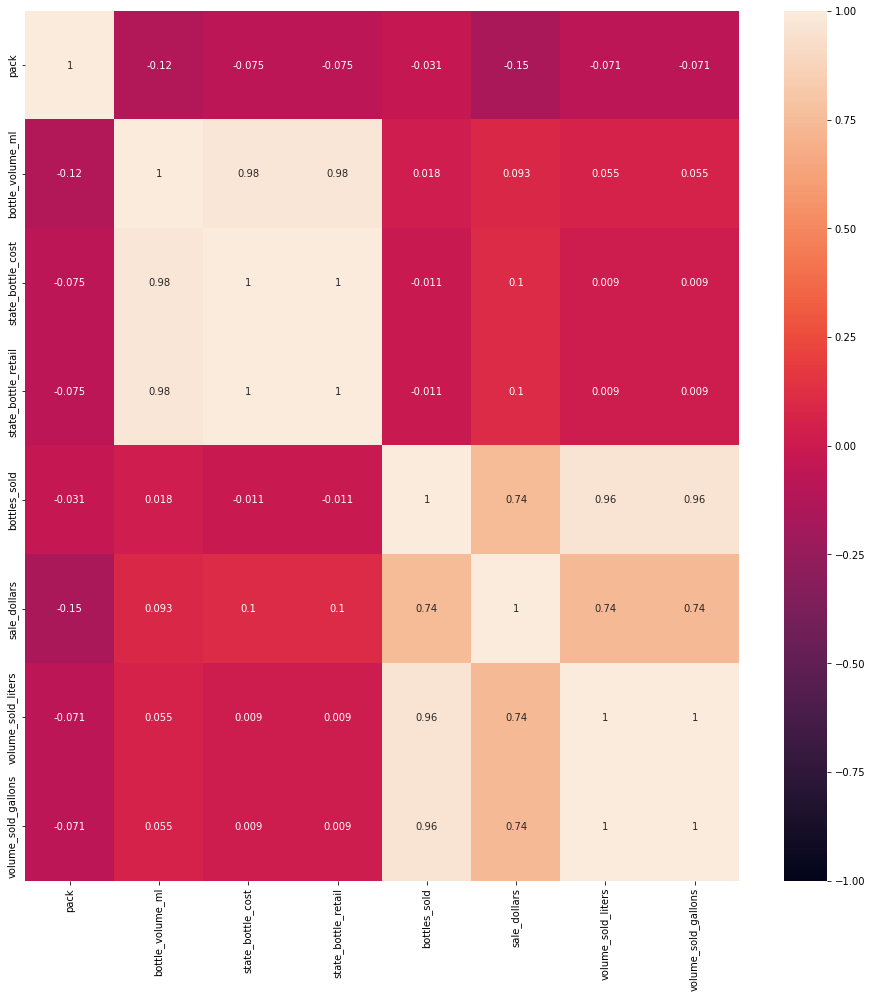

In [ ]:
plt.figure(figsize=(16, 16))
df_int = df[['pack','bottle_volume_ml','state_bottle_cost','state_bottle_retail','bottles_sold','sale_dollars','volume_sold_liters','volume_sold_gallons']]
sns.heatmap(df_int.corr(),vmin=-1, vmax=1, annot=True)
plt.savefig('/content/drive/MyDrive/CMPE 255/Correlation_Matrix.pdf')

# Scatter Plot for Volume Sold Vs Sales in dollars 

In [ ]:
fig = px.scatter(df_scatter,x="sale_dollars", y="volume_sold_liters" ,color='item_description',trendline="ols",trendline_scope="overall",trendline_color_override="black")
fig.show()

# Histogram Plot for Bottles Sold

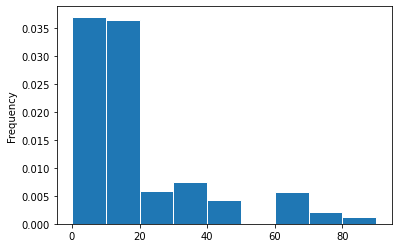

In [ ]:
plt.figure()
bottles_sold = df['bottles_sold'].dropna()
bw_bins = range(0, 100, 10)
bottles_sold.plot(kind = 'hist', density=True, bins=bw_bins, ec='w')
plt.savefig("/content/drive/MyDrive/CMPE 255/Histogram.pdf")

# Histogram Plot for Pack size

In [ ]:
fig = px.histogram(df, x="pack", nbins=15)
fig.show()

In [ ]:

grouped_on_sales_df = df[["city","sale_dollars","Month"]].groupby(by = ['city',"Month"],as_index = False).sum()

grouped_on_sales_df = grouped_on_sales_df.sort_values(by = "sale_dollars", axis=0, ascending=False)

grouped_on_sales_df = grouped_on_sales_df.sort_values(by = "Month", axis=0, ascending=False)

In [ ]:
fig = px.line(grouped_on_sales_df, x="Month", y="sale_dollars" , color="city")
fig.show()

# Top 10 Cities Monthly Liquor Trends

In [ ]:
  grouped_on_sales_df = df[["city","sale_dollars","Month"]].groupby(by = ['city',"Month"],as_index = False).sum()

  grouped_on_sales_df = grouped_on_sales_df.sort_values(by = "sale_dollars", axis=0, ascending=False)

  grouped_on_sales_df = grouped_on_sales_df.sort_values(by = "Month", axis=0, ascending=False)

  cities = grouped_on_sales_df[["city","sale_dollars"]].groupby(by ='city',as_index = False).sum()
  cities = cities.sort_values(by="sale_dollars",ascending=False).head(10)

  new_df=pd.DataFrame()
  for c in cities['city']:
      print(c)
      temp_df = grouped_on_sales_df[grouped_on_sales_df["city"] == c ]
      new_df = new_df.append(temp_df, ignore_index=True)
  
  new_df = new_df.sort_values(by = ["Month","city"], axis=0, ascending=False)
  fig = px.line(new_df, x="Month", y="sale_dollars" 
              , color="city")
  fig.show()

DES MOINES
Des Moines
Cedar Rapids
CEDAR RAPIDS
West Des Moines
Waterloo
WEST DES MOINES
AMES
Davenport
DAVENPORT


# Save Data Back to Biq Query

In [ ]:
output_dataset_id = 'Iowa_Liquor_Data'

output_table_id = 'sales_volume_table' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))

Dataset emerald-cacao-363700.Iowa_Liquor_Data exists



In [ ]:

job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Use client functionality to load BigQuery table from Pandas data frame
client.load_table_from_dataframe(
 dataframe = top_count,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning:

Unable to determine type of column 'category_name'.



Write to bigquery dataset (replace) to emerald-cacao-363700.Iowa_Liquor_Data.sales_volume_table

